In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

plt.rcParams['figure.figsize'] = (20,20)

# Explanantion of doubts through examples
- What exactly do we mean by extraction of features when we perform different of gaussian, and how does subtraction of different levels of blurred image lead to that 
- Why not just subtract the least blurred and the most blurred image to get the features or interesting points ?
- Why do we create descriptors or find a need for descriptor at the end of sift algorithm

In [2]:
img = cv2.imread("casemiro.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

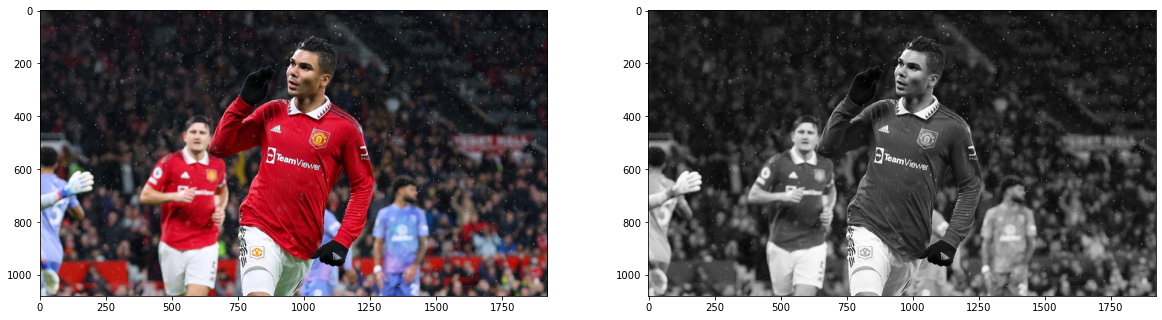

In [3]:
f, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(gray,cmap='gray')
plt.show()

# Example
- Lets say this is octave 1, so we will create 5 blur levels, let the sigma value s be 1 and for each blur level a constant factor k will be used to multiply, let k = 4
    - gray1: $k^{0}$ * s
    - gray2: $k^{1}$ * s
    - gray3: $k^{2}$ * s
    - gray4: $k^{3}$ * s
    - gray5: $k^{4}$ * s

In [4]:
gray1 = cv2.GaussianBlur(gray, (0,0), 1)
gray2 = cv2.GaussianBlur(gray, (0,0), 4)
gray3 = cv2.GaussianBlur(gray, (0,0), 16)
gray4 = cv2.GaussianBlur(gray, (0,0), 64)
gray5 = cv2.GaussianBlur(gray, (0,0), 256)

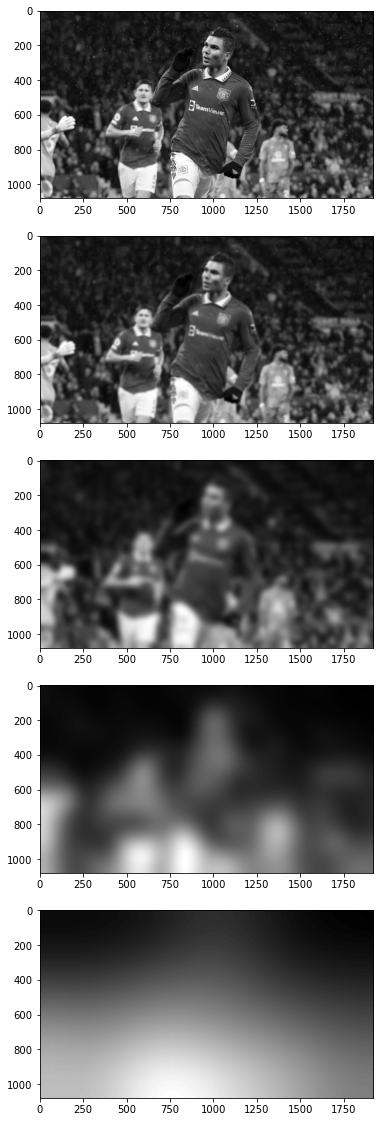

In [5]:
f, ax = plt.subplots(5,1)
ax[0].imshow(gray1,cmap='gray')
ax[1].imshow(gray2,cmap='gray')
ax[2].imshow(gray3,cmap='gray')
ax[3].imshow(gray4,cmap='gray')
ax[4].imshow(gray5,cmap='gray')
plt.show()

## Why you should not subtract the least blurred with most blurred ?
- You can see many noisy subtractions and hence many noisy blobs or patches of varying sizes (called noisy because of varying sizes)
- Some blobs are patches are enhanced but they do not have definite shape, so it creates problem for our objective of scale invariance

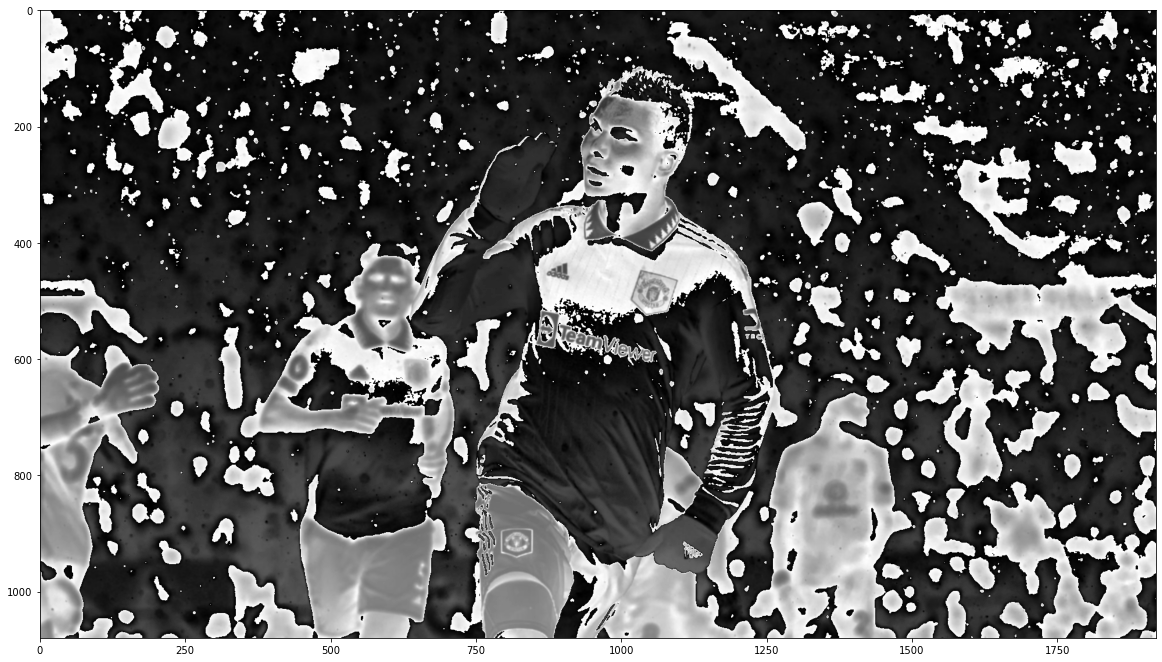

In [7]:
plt.imshow(gray1-gray5,cmap='gray')

## Why immediate next blur subtraction works, Difference of Gaussians ?

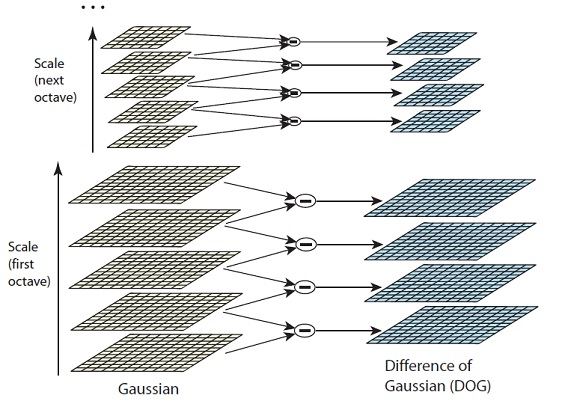

- Subtraction between imediate blur levels of image helps you find blobs/patches/interesting points of same scale

## Why Difference of Gaussians creates features/patches/interesting points ?
- As you can see in the images below subtracting different levels of blurs highlights the details in the images
- blur level 1: gray1 has some details that are blurred
- blur level 2: gray2 has some more details that are blurred
- Result below shows the enhanced details between two blurs

**Note:** There is a whole mathematical reasoning behind why this works, but it goes beyond the scope of our subject. Our objective here is to understand why handcrafted features like SIFT which are highly math oriented were so tedious compared to the current day deep learning methods

### Difference between Blur1 and Blur2

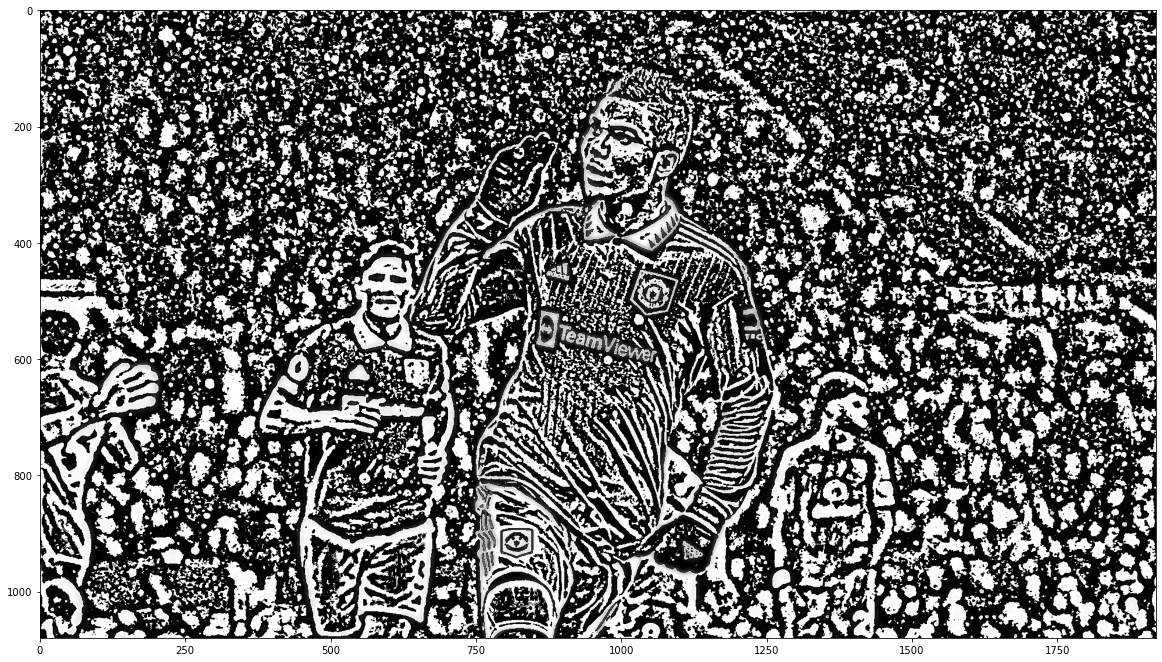

In [8]:
plt.imshow(gray2-gray1,cmap='gray')

### Difference between Blur2 and Blur3

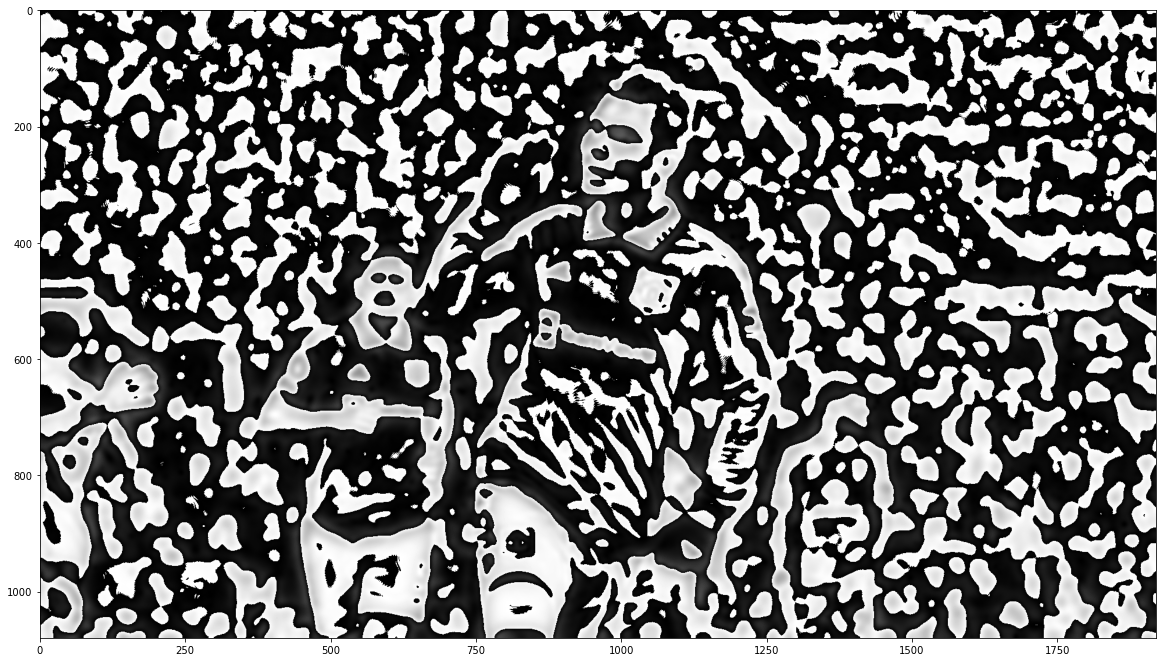

In [9]:
plt.imshow(gray3-gray2,cmap='gray')

### Difference between Blur3 and Blur4

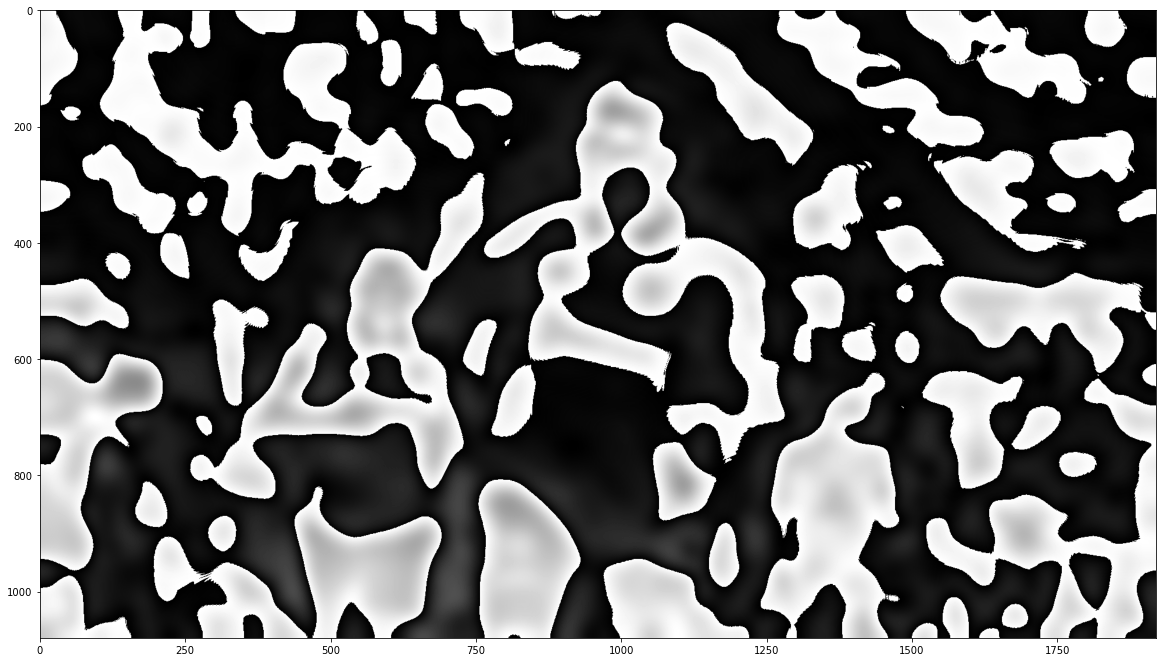

In [10]:
plt.imshow(gray4-gray3,cmap='gray')

### Difference between Blur4 and Blur5

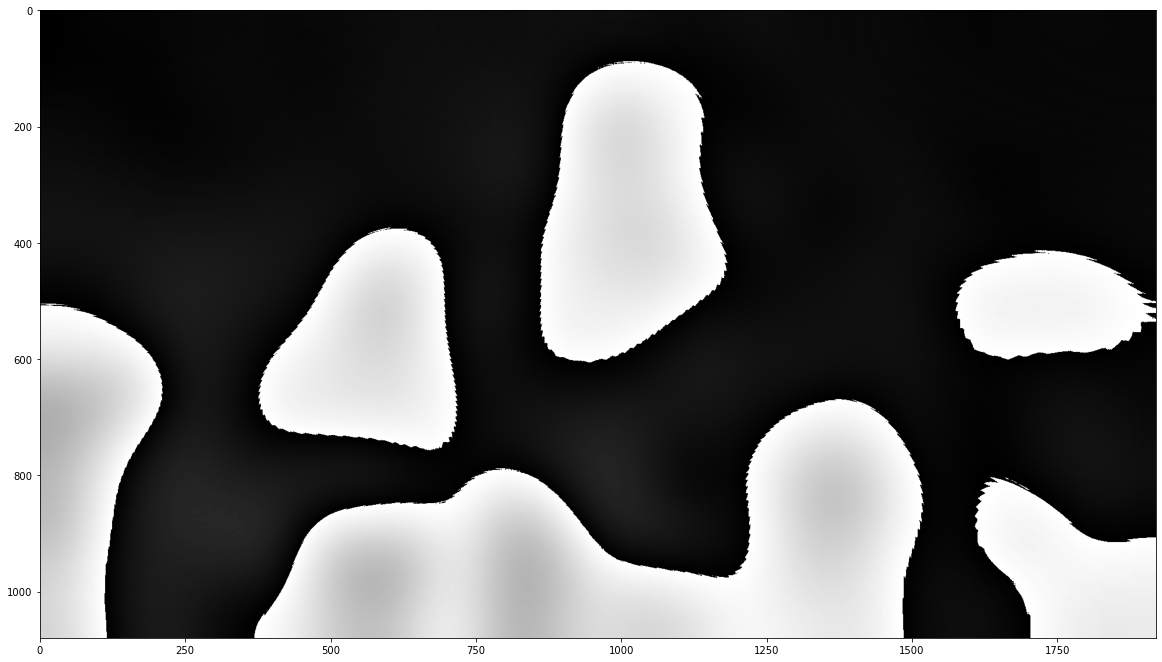

In [11]:
plt.imshow(gray5-gray4,cmap='gray')

## Same is repeated for Octave 2
- The size of the image is reduced by half in octave 2

In [12]:
gray.shape

(1080, 1920)

In [13]:
h,w = gray.shape 

In [14]:
gray_oct2 = cv2.resize(gray,(w//2,h//2), interpolation = cv2.INTER_LINEAR)

In [15]:
gray_oct2.shape

(540, 960)

In [16]:
gray_oct21 = cv2.GaussianBlur(gray_oct2, (0,0), 1)
gray_oct22 = cv2.GaussianBlur(gray_oct2, (0,0), 4)
gray_oct23 = cv2.GaussianBlur(gray_oct2, (0,0), 16)
gray_oct24 = cv2.GaussianBlur(gray_oct2, (0,0), 64)
gray_oct25 = cv2.GaussianBlur(gray_oct2, (0,0), 256)

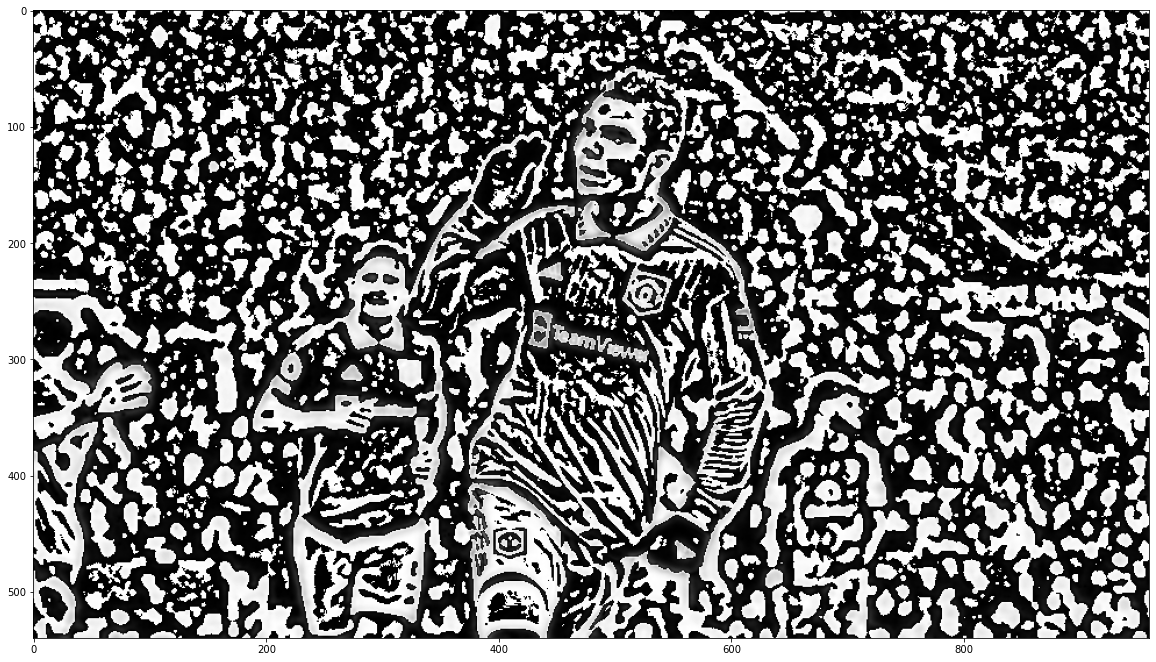

In [17]:
plt.imshow(gray_oct22-gray_oct21,cmap='gray')

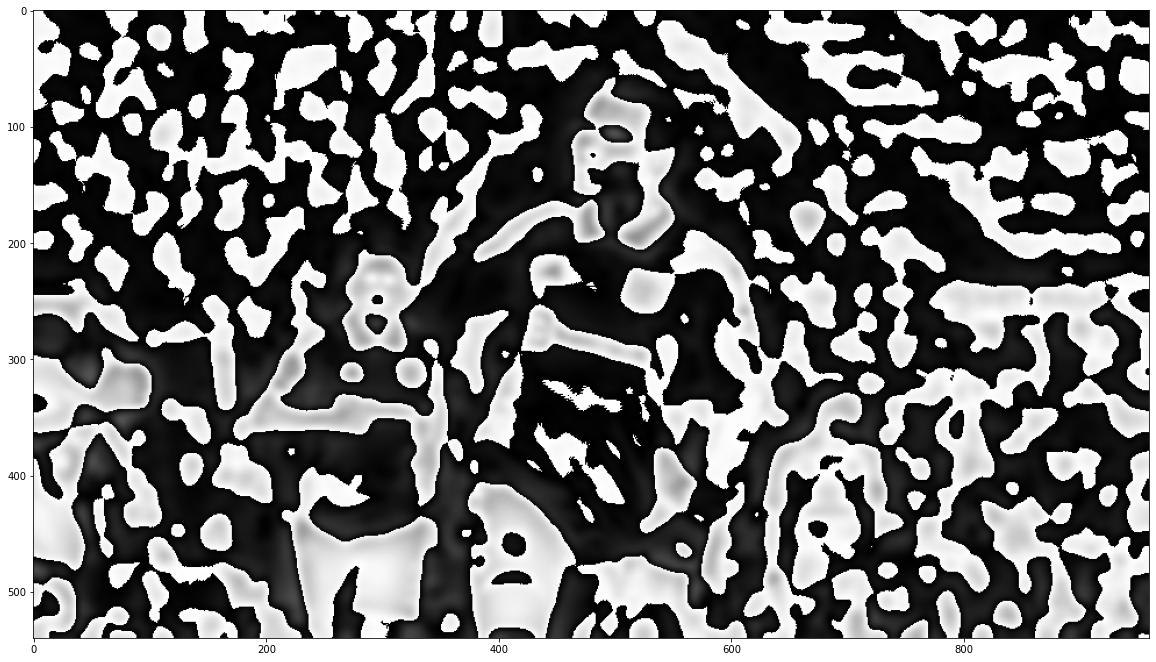

In [18]:
plt.imshow(gray_oct23-gray_oct22,cmap='gray')

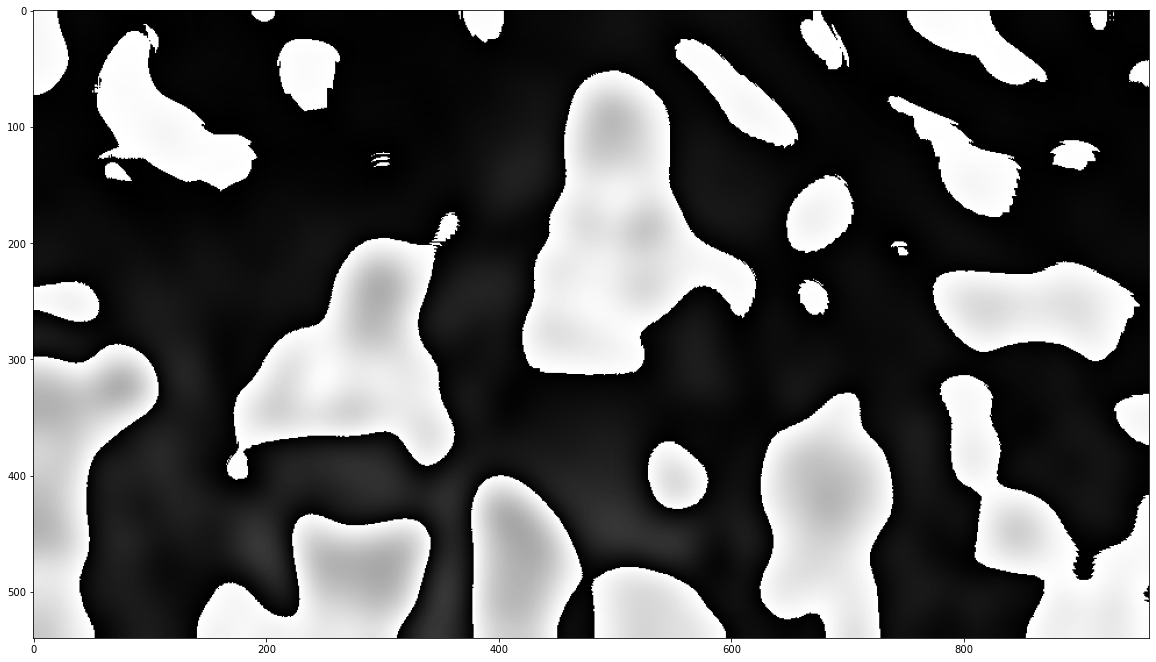

In [19]:
plt.imshow(gray_oct24-gray_oct23,cmap='gray')

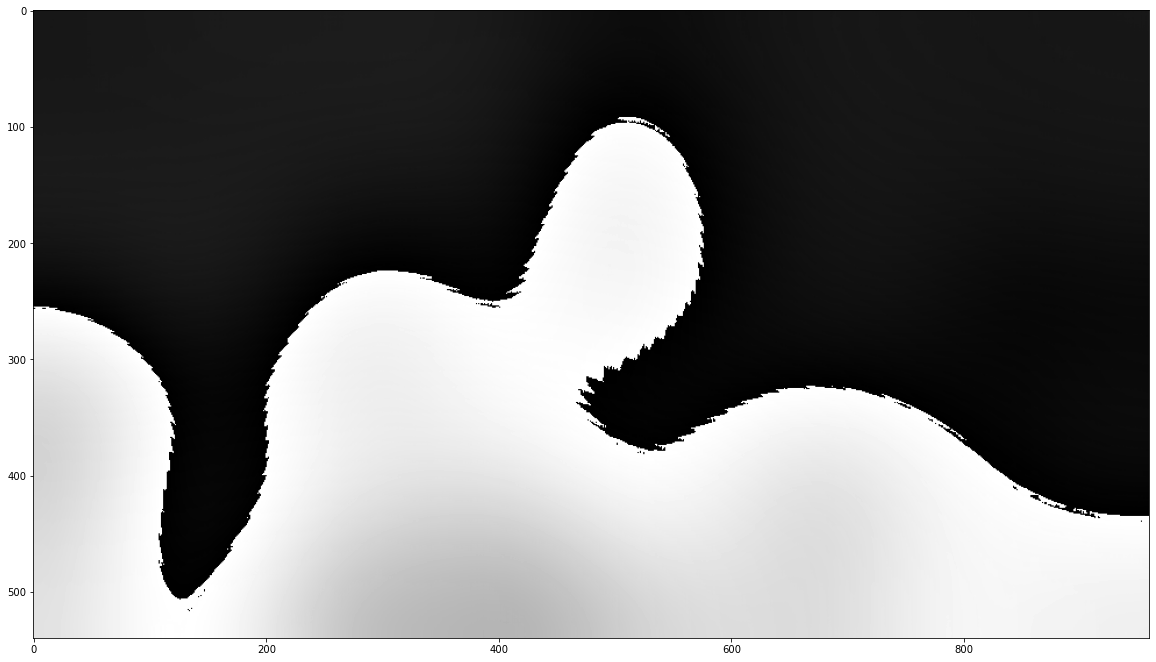

In [20]:
plt.imshow(gray_oct25-gray_oct24,cmap='gray')

## Same is repeated for Octave 3
- The size of the image from octave 2 is reduced by half in octave 3

In [58]:
h,w = gray_oct2.shape 

In [59]:
gray_oct3 = cv2.resize(gray,(w//2,h//2), interpolation = cv2.INTER_LINEAR)

In [62]:
gray_oct3.shape

(270, 480)

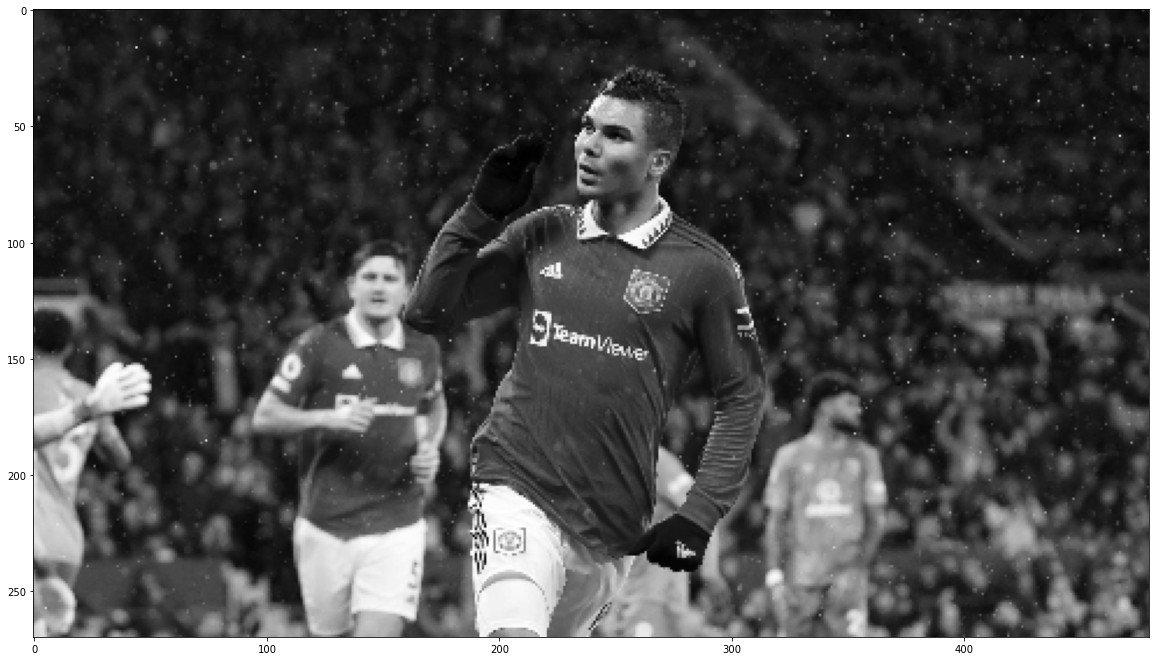

In [61]:
plt.imshow(gray_oct3,cmap='gray')

## And so on.......
- Repeated till the number of octaves that have been defined for the algorithm
- The original paper suggests ideal number of octaves should be four

## Why do we need to create a descriptor ?
- Whenever you extract a feature in an image or from any data in general you want it in some mathematical form so that it can be compared by using some mathematical formula. In machine learning and computer vision space, this mathematical representation is usually a vector or a matrix.
- Like a row of record in your tabular data which is represented as a vector, each feature/blob/keypoint in the image can be represented using a vector
- These vectors in terms of the SIFT algorithm are known as descriptors and are a vector of size 128
- Since there are multiple features/blobs detected in an image the dimension/shape of the descriptor will be (no. of blobs, 128)
- Now if you want to compare any two images using their respective features, you can do a brute force matching between the descriptors (vectors) of both the images. Since they are vectors a distance is calculated between them to check if they match or not. These distances are usually L1 (abs diff) L2 (euclidean distance) or some other distance metric

In [63]:
sift = cv2.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(gray,None)

In [66]:
descriptors_1.shape

(3375, 128)

In [72]:
descriptors_1

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [ 44.,   6.,   4., ...,  21.,   8.,   1.],
       [  8.,  13.,   2., ...,   1.,   2.,   0.],
       ...,
       [  5.,   2.,   0., ...,   0.,   0.,   0.],
       [  0.,   1.,   0., ...,   0.,   1.,  45.],
       [  9., 135.,  29., ...,   0.,   0.,  38.]], dtype=float32)